In [1]:
from eddy import rotationmap, linecube
import bettermoments as bm
from astropy.io import fits
from spectral_cube import SpectralCube
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from astropy.nddata import Cutout2D
#from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

import matplotlib.font_manager as fm

from multiprocessing import Pool

In [3]:
ALMAData = fits.open('fits/AT_Pyx_CO_selfcal_30s.contsub.cvel.image.fits')
cube = SpectralCube.read(ALMAData)
print(cube)

VaryingResolutionSpectralCube with shape=(14, 1024, 1024) and unit=Jy / beam:
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   127.160984 deg:  127.178078 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -33.779886 deg:  -33.765677 deg
 n_s:     14  type_s: FREQ      unit_s: Hz     range: 230530151562.400 Hz:230536649150.141 Hz


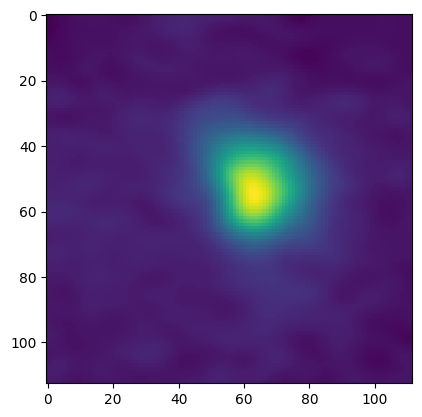

In [4]:
sub_cube_slab = cube.spectral_slab(2.3053e+11 *u.Hz, 2.30536e+11 *u.Hz)

lat_range = [-33.7720066,-33.7735693] * u.deg
lon_range = [127.1686176,127.1704721] * u.deg

sub_cube_slab = cube.subcube(xlo = lon_range[0],xhi=lon_range[1],ylo=lat_range[0],yhi=lat_range[1])


subcubearray = np.array(sub_cube_slab)

sub_cube_slab[5,:,:].quicklook()

NoOverlapError: Arrays do not overlap.

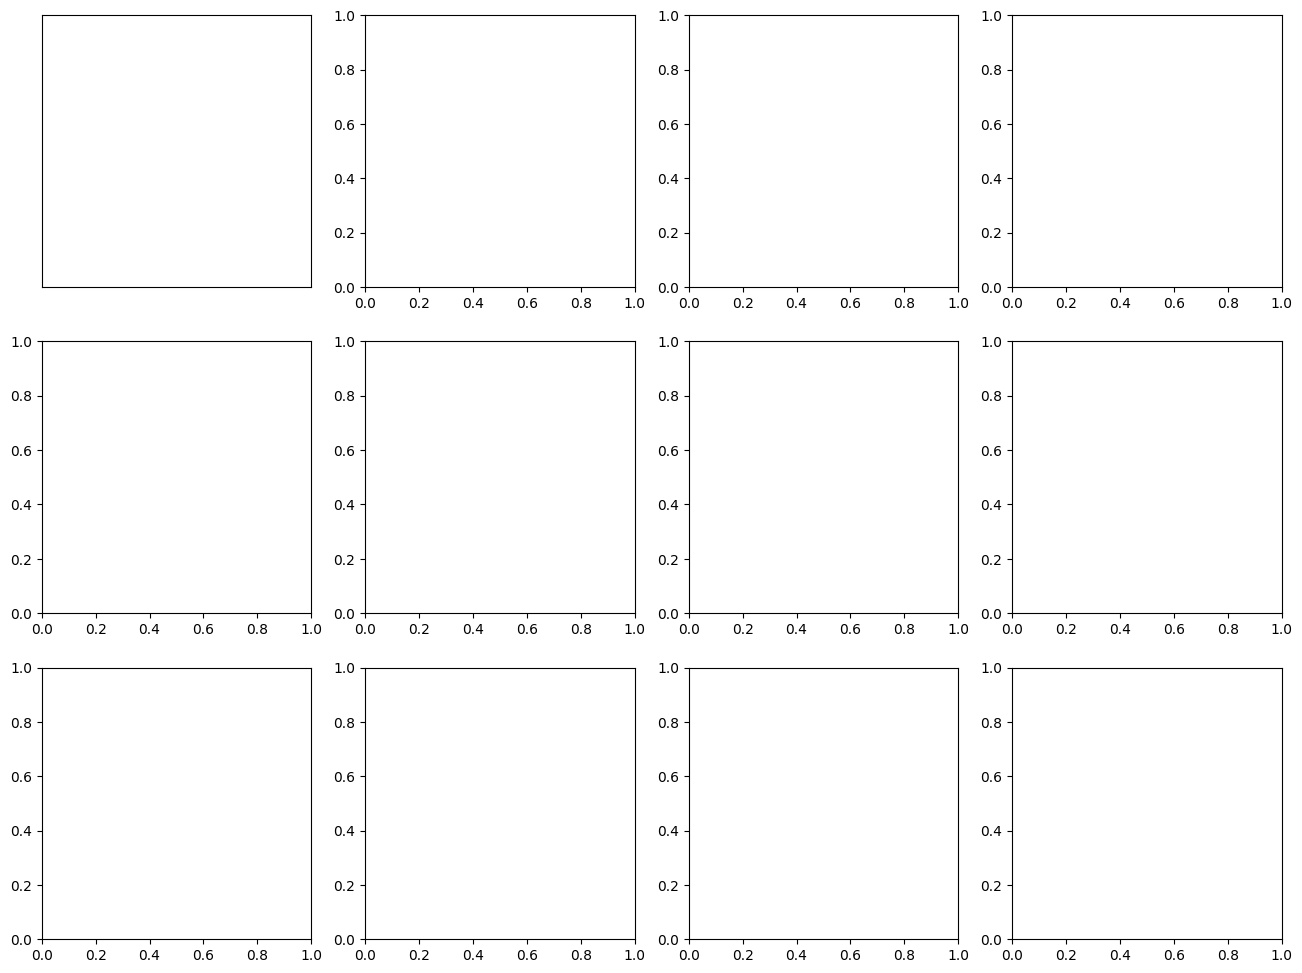

In [19]:



sub_cube_slab = cube.spectral_slab(2.3053e+11 *u.Hz, 2.30536e+11 *u.Hz)

lat_range = [-33.7720066,-33.7735693] * u.deg
lon_range = [127.1686176,127.1704721] * u.deg

sub_cube_slab = cube.subcube(xlo = lon_range[0],xhi=lon_range[1],ylo=lat_range[0],yhi=lat_range[1])


subcubearray = np.array(sub_cube_slab)
#print(subcubearray[0])
m=1
fig, ax = plt.subplots(3,4,figsize=(16*m,12*m),squeeze=True)
imgsize=300
fontprops = fm.FontProperties(size=12)
#fig.supxlabel('$\Delta$RA (arcsec)')
#fig.supylabel('$\Delta$Dec (arcsec)')

for image in range(0,4):
    
    ax[0,image].tick_params(
        axis='both',          # changes apply to both axes
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False, 
        left=False,
        right=False,
        labelbottom=False,
        labelleft=False)
    ax[0,image].imshow(Cutout2D(subcubearray[image+1],(256.5,256.5),(imgsize,imgsize)).data,
                       cmap='inferno',origin='lower',vmin=0,extent=[-0.08172*imgsize/2,0.08172*imgsize/2,
                                                                    -0.08172*imgsize/2,0.08172*imgsize/2])
    ax[0,image].set_title('$\Delta$Velocity = {}km/s'.format((image+1-7)*(1.27)))
    scalebar = AnchoredSizeBar(ax[0,image].transData,
                           5, '5"', 'lower left', 
                           pad=0.5,
                           color='white',
                           frameon=False,
                           size_vertical=0.5,
                           fontproperties=fontprops
                           )
    ax[0,image].add_artist(scalebar)


for image in range(0,4):
    ax[1,image].tick_params(
        axis='both',          # changes apply to both axes
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False, 
        left=False,
        right=False,
        labelbottom=False,
        labelleft=False)
    ax[1,image].imshow(Cutout2D(subcubearray[image+5],(len(subcubearray[image+5])/2,len(subcubearray[image+5]/2)),(imgsize,imgsize)).data,
                       cmap='inferno',origin='lower',vmin=0,extent=[-0.08172*imgsize/2,0.08172*imgsize/2,
                                                                    -0.08172*imgsize/2,0.08172*imgsize/2])
    ax[1,image].set_title('$\Delta$Velocity = {}km/s'.format((image+5-7)*(1.27)))
    scalebar = AnchoredSizeBar(ax[1,image].transData,
                           5, '5"', 'lower left', 
                           pad=0.5,
                           color='white',
                           frameon=False,
                           size_vertical=0.5,
                           fontproperties=fontprops
                           )
    ax[1,image].add_artist(scalebar)

for image in range(0,4):
    ax[2,image].tick_params(
        axis='both',          # changes apply to both axes
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False, 
        left=False,
        right=False,
        labelbottom=False,
        labelleft=False)
    ax[2,image].imshow(Cutout2D(subcubearray[image+9],(256.5,256.5),(imgsize,imgsize)).data,
                       cmap='inferno',origin='lower',vmin=0,extent=[-0.08172*imgsize/2,0.08172*imgsize/2,
                                                                    -0.08172*imgsize/2,0.08172*imgsize/2])
    ax[2,image].set_title('$\Delta$Velocity = {}km/s'.format((image+9-7)*(1.27)))
    scalebar = AnchoredSizeBar(ax[2,image].transData,
                           5, '5"', 'lower left', 
                           pad=0.5,
                           color='white',
                           frameon=False,
                           size_vertical=0.5,
                           fontproperties=fontprops
                           )
    ax[2,image].add_artist(scalebar)


plt.savefig('ALMASlices.pdf',bbox_inches='tight')

In [6]:
sub_cube_slab.write('fits/ATPyxSubCubeNew.fits', format='fits',overwrite=True)  

In [43]:
data, velax = bm.load_cube('fits/ATPyxSubCubeNew.fits')

smoothed_data = bm.smooth_data(data=data,smooth=2,polyorder=0)
rms = bm.estimate_RMS(data=data, N=1)
rms_smoothed = bm.estimate_RMS(data=smoothed_data, N=1)

print('RMS = {:.1f} mJy/beam (original)'.format(rms * 1e3))
print('RMS = {:.1f} mJy/beam (smoothed)'.format(rms_smoothed * 1e3))

RMS = 5.1 mJy/beam (original)
RMS = 4.5 mJy/beam (smoothed)


In [44]:
user_mask = bm.get_user_mask(data=data, user_mask_path=None)

threshold_mask=bm.get_threshold_mask(data=data,
                                    clip=3,
                                    smooth_threshold_mask=0.5)

channel_mask = bm.get_channel_mask(data=data,
                                   firstchannel=0,
                                   lastchannel=-1)

mask = bm.get_combined_mask(user_mask=user_mask,
                            threshold_mask=threshold_mask,
                            channel_mask=channel_mask,
                            combine='and')
masked_data = data * mask

bm.available_collapse_methods()

Available methods are:

	 zeroth       (integrated intensity)
	 first        (intensity weighted average velocity)
	 second       (intensity weighted velocity dispersion)
	 eighth       (peak intensity)
	 ninth        (velocity channel of peak intensity)
	 maximum      (both collapse_eighth and collapse_ninth)
	 quadratic    (quadratic fit to peak intensity)
	 width        (effective width for a Gaussian profile)
	 percentiles  (intesity weighted percentiles)
	 gaussian     (gaussian fit)
	 gaussthick   (gaussian with optically thick core fit)
	 gausshermite (gaussian-hermite expansion fit)
	 doublegauss  (double gaussian fit)

Call the function with `collapse_{method_name}`.


In [45]:
#moments = bm.collapse_quadratic(velax=velax, data=data, rms=rms)

In [46]:
#bm.save_to_FITS(moments=moments, method='quadratic', path='fits/ATPyxSubCubeNew.fits')

Assuming uncertainties in fits/TestCube_dgv0.fits.
No uncertainties found, assuming uncertainties of 10%.
Change this at any time with `rotationmap.error`.


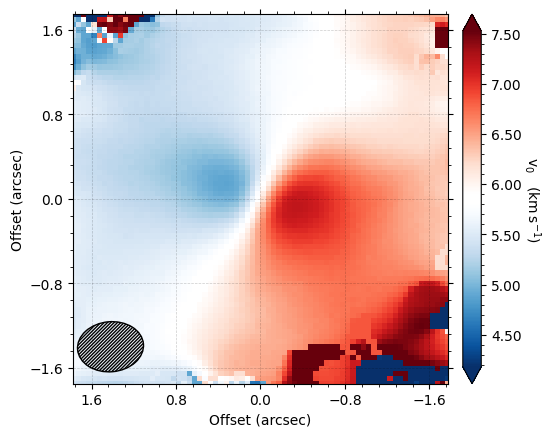

In [2]:
cube = rotationmap(path='fits/TestCube_gv0.fits',
                   #uncertainty='fits/ATPyxSubCubeNew_dgv0.fits',
                   #downsample=2,
                   FOV=3.5
                  )
cube.plot_data()

print(cube)

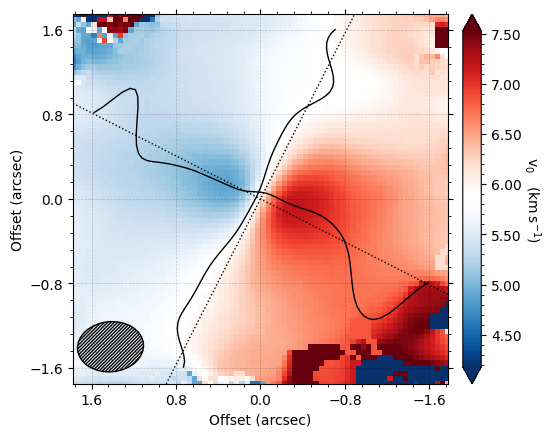

In [3]:
cube.plot_maxima(inc=38.5,PA=243, r_max=4.0, smooth=0.3)

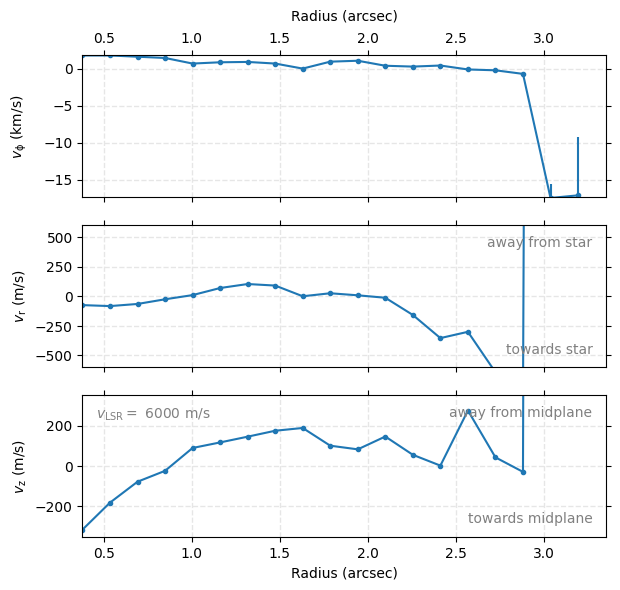

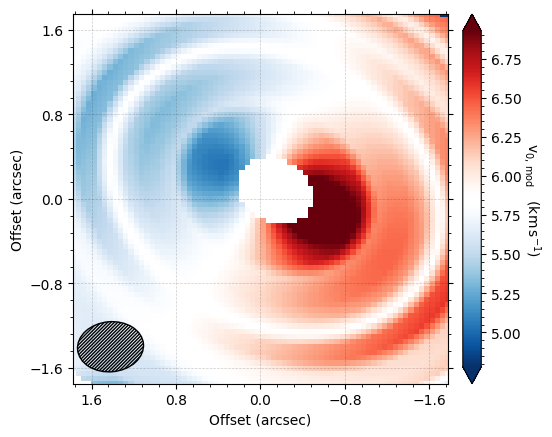

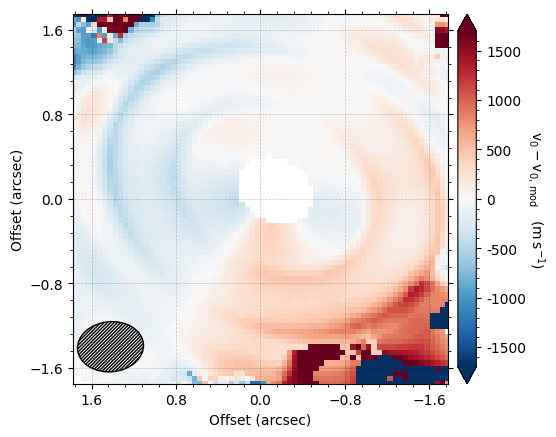

In [4]:
r, v, dv = cube.fit_annuli(x0=-0.14, y0=0.0863, inc=38.5, PA=243.0,
                           fit_vrad=True, fix_vlsr=6e3,
                           rbins=np.arange(0.3, 3.5, 0.25 * cube.bmaj))

Assuming:
	p0 = [x0, y0, PA, mstar, vlsr, z0, psi, r_taper, q_taper].


100%|███████████████████████████████████████| 2500/2500 [03:25<00:00, 12.16it/s]


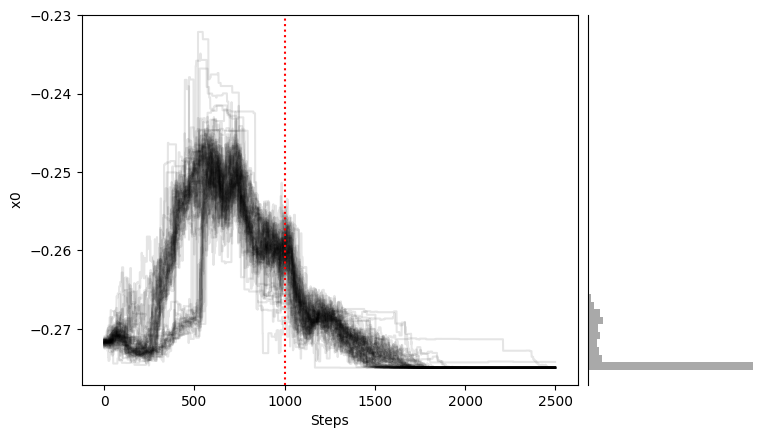

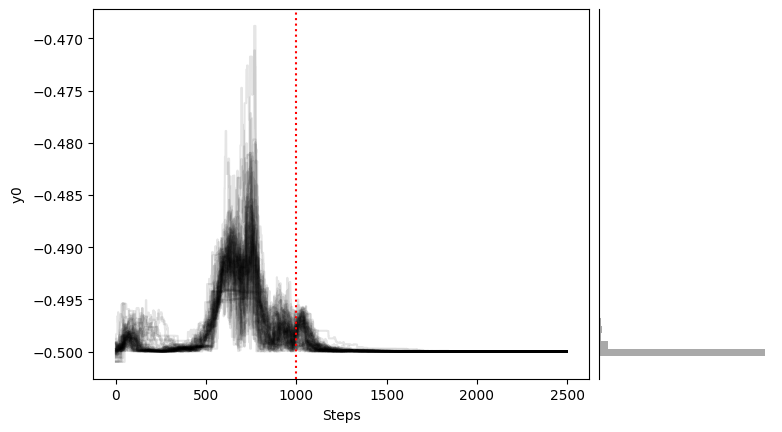

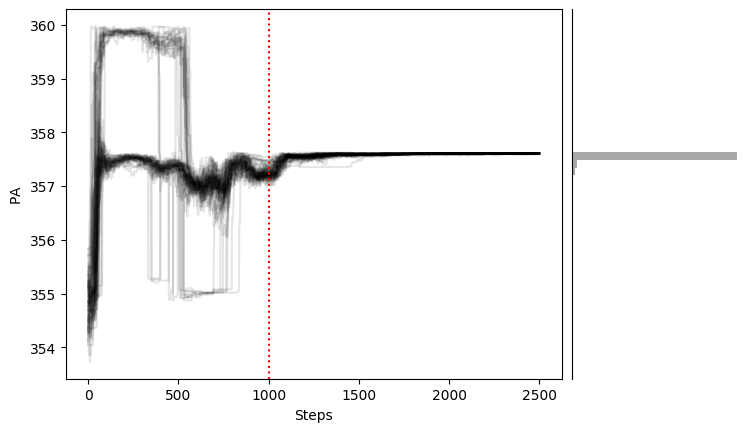

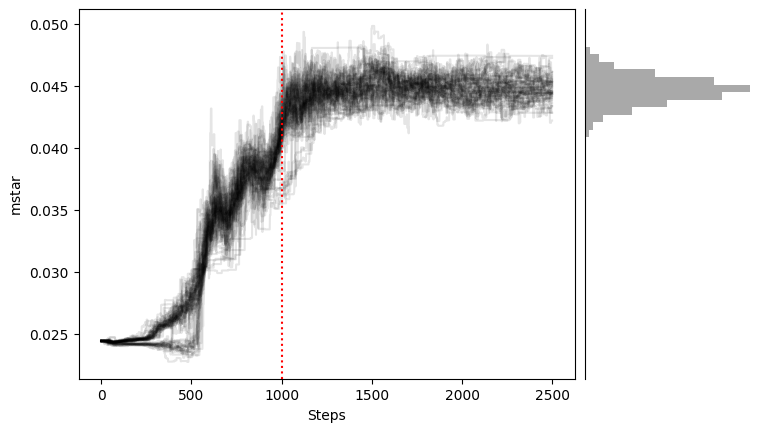

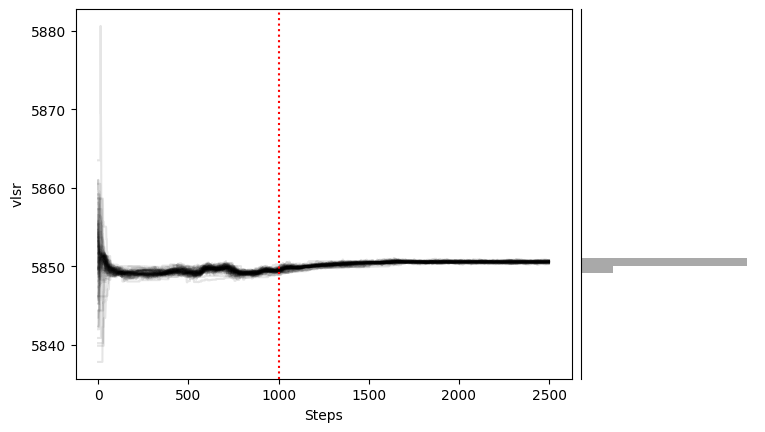

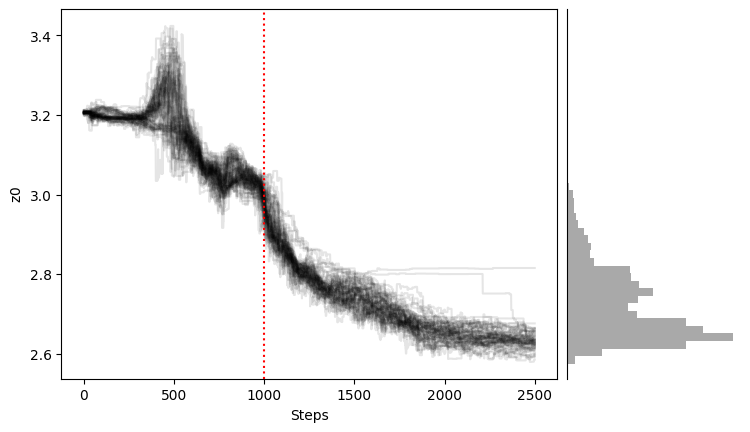

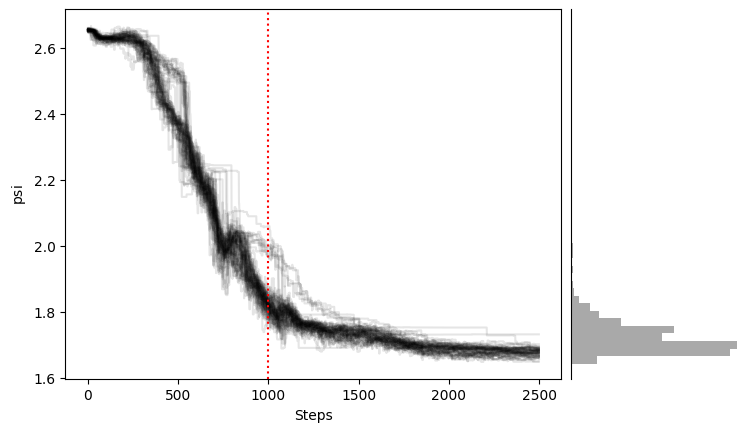

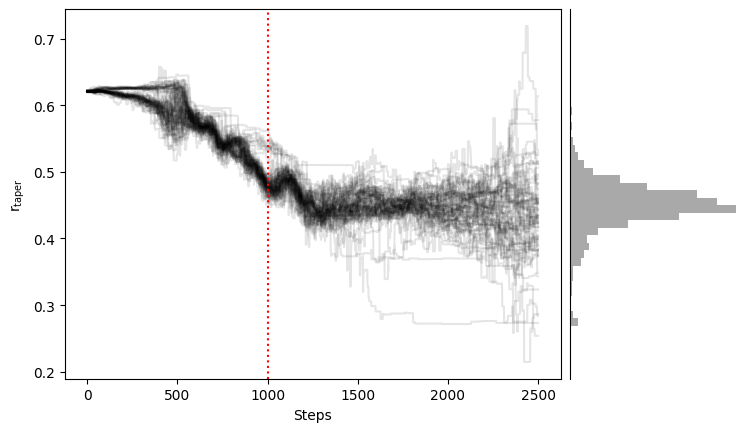

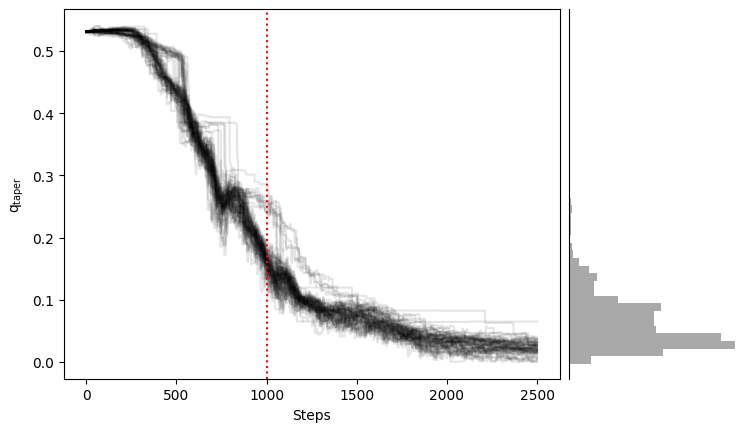

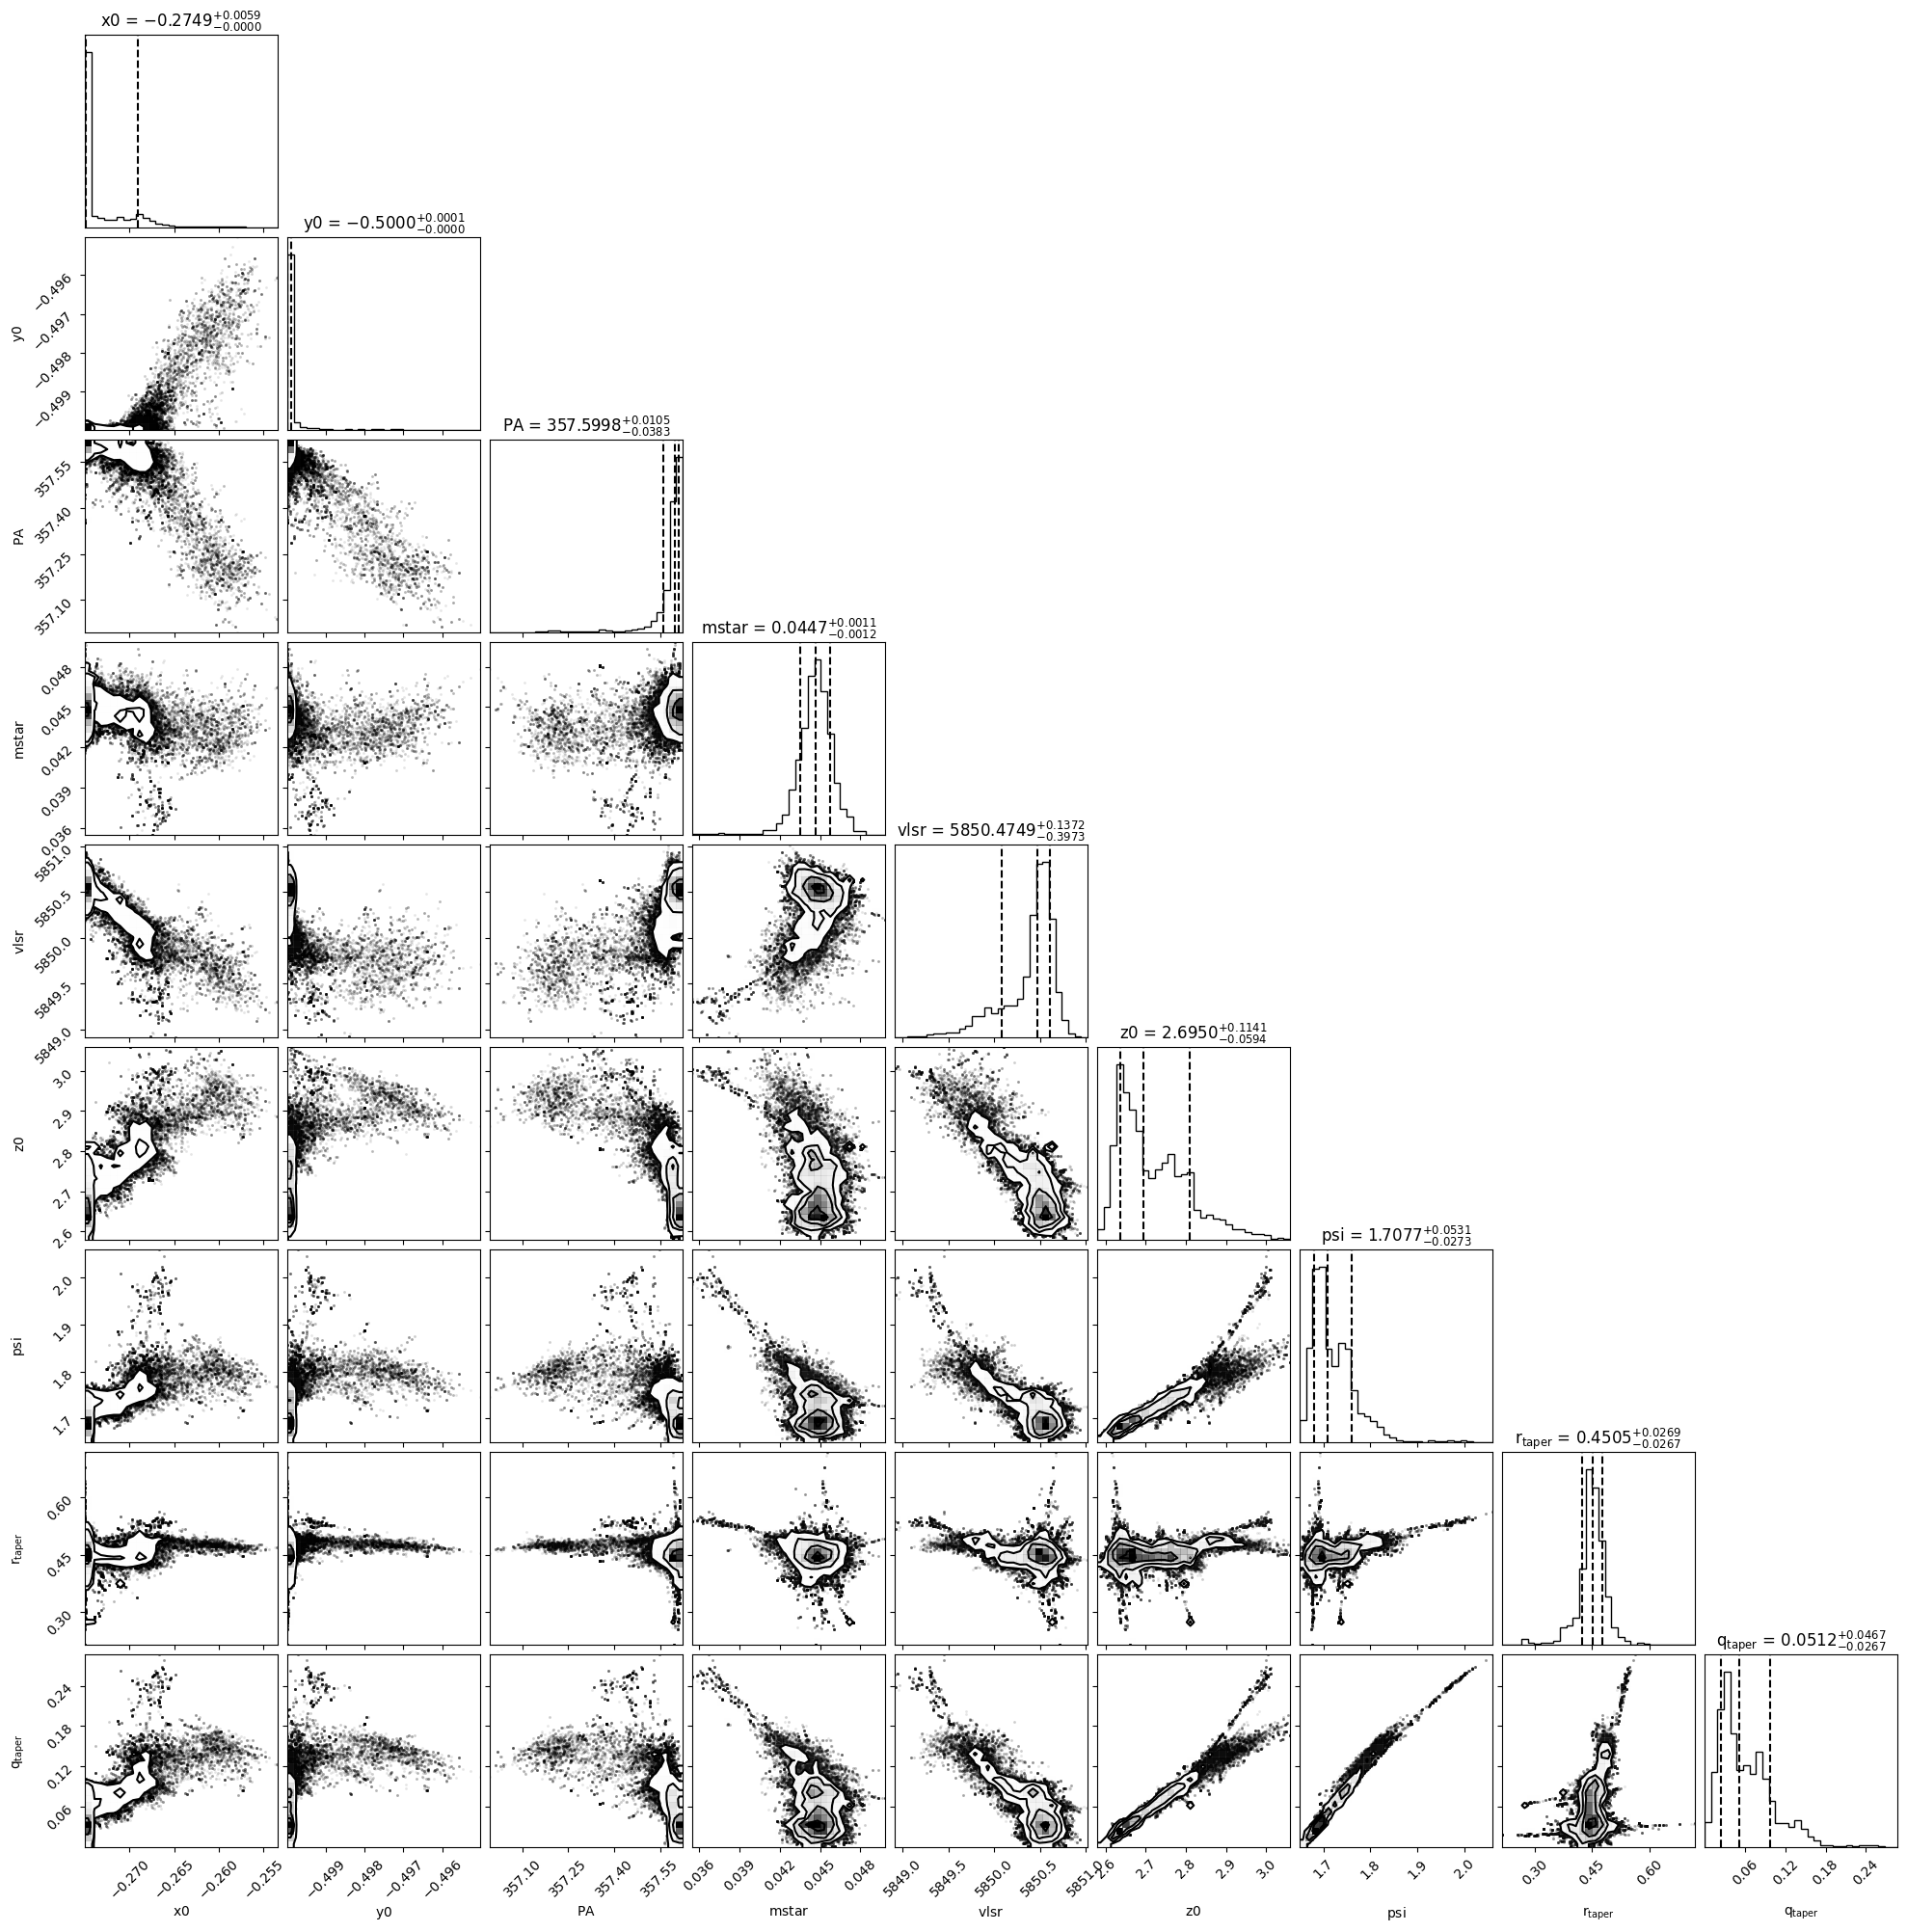

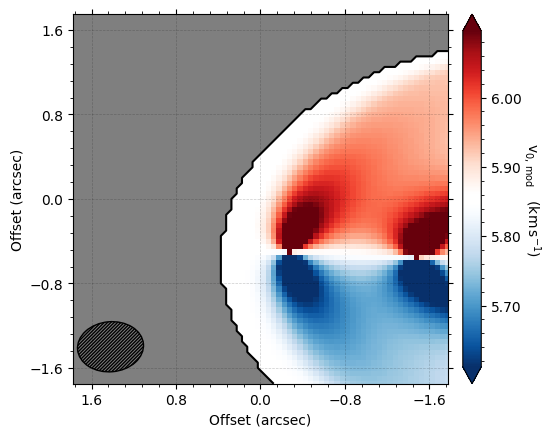

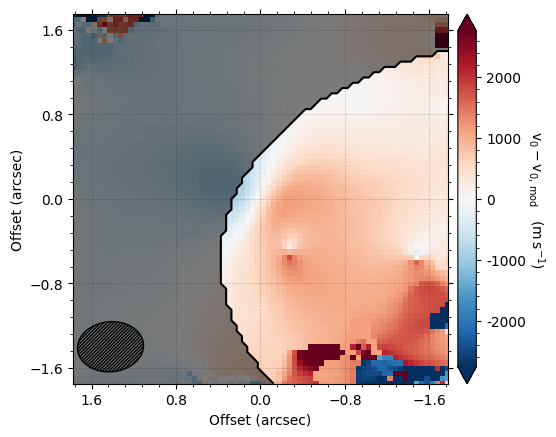

In [5]:

params = {}
params['x0'] = 0
params['y0'] = 1
params['PA'] = 2
params['mstar'] = 3
params['vlsr'] = 4

p0 = [-0.14, 0.0863, 241., 1.23, 6.0]

params['inc'] = 38.5
params['dist'] = 370.0

# Include elevated emission surface parameters.

params['z0'] = 5
params['psi'] = 6
params['r_taper'] = 7
params['q_taper'] = 8

#params['v_max'] = 7
#params['v_min'] = 8

p0 += [0.446, 1.2,3.0,2.0]

with Pool() as pool:
    samples = cube.fit_map(p0=p0, params=params, optimize=False,
                           nwalkers=64, nburnin=1000, nsteps=1500,niter=5,pool=pool
                           )

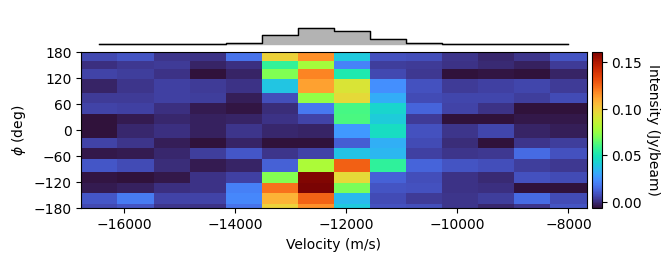

In [28]:
cube = linecube('fits/ATPyxSubCubeNew.fits')
annulus = cube.get_annulus(r_min=1.4,r_max=1.6,inc=38.5,PA=241.)
annulus.plot_river()

In [19]:
x, y, dy = annulus.deprojected_spectrum(vrot=0.0)

(-16148.214339995513, -8301.785768238708)

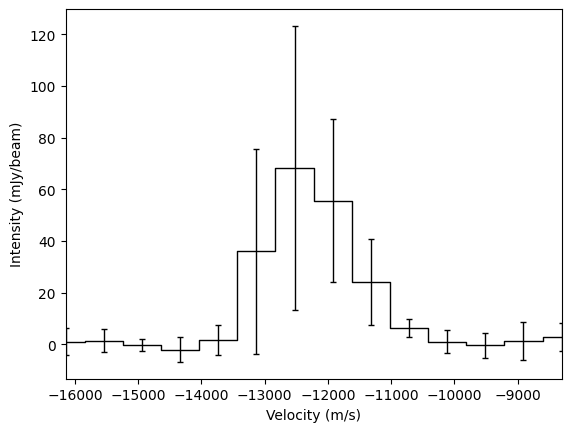

In [20]:
fig, ax = plt.subplots()
ax.errorbar(x, y * 1e3, dy * 1e3, fmt=' ', capsize=2.0, lw=1.0, color='k')
ax.step(x, y * 1e3, where='mid', lw=1.0, color='k')
ax.set_ylabel('Intensity (mJy/beam)')
ax.set_xlabel('Velocity (m/s)')
ax.set_xlim(x.min(), x.max())

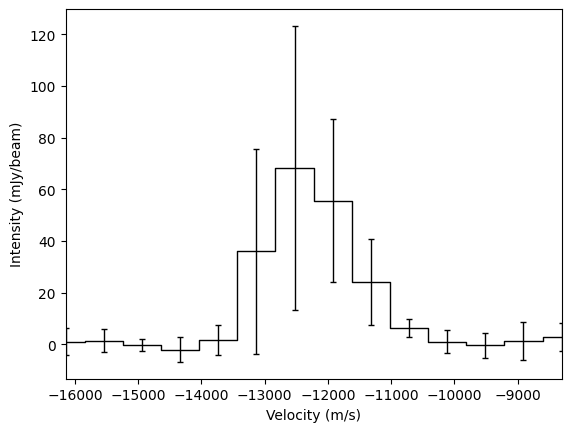

In [21]:
annulus.plot_spectrum(vrot=0.0)

In [22]:
v, dv = annulus.get_vlos(fit_method='SHO')
v_phi, dv_phi = v[0], dv[0]
print('v_phi = {:.0f} +\- {:.0f} m/s'.format(v_phi, dv_phi))

v_phi = 1058 +\- 196 m/s


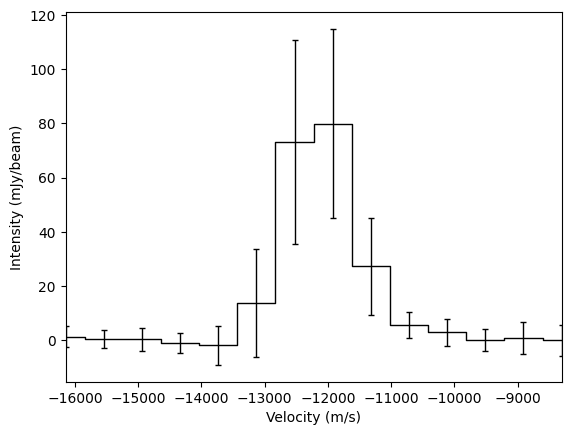

In [23]:
annulus.plot_spectrum(vrot=v_phi)

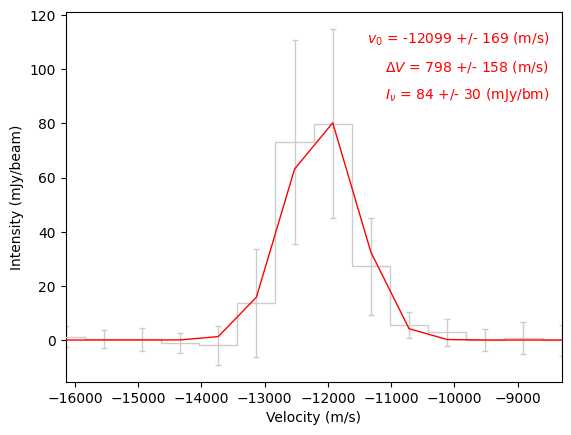

In [24]:
annulus.plot_spectrum(vrot=v_phi, plot_fit=True)

mean spacing = 41.2 m/s


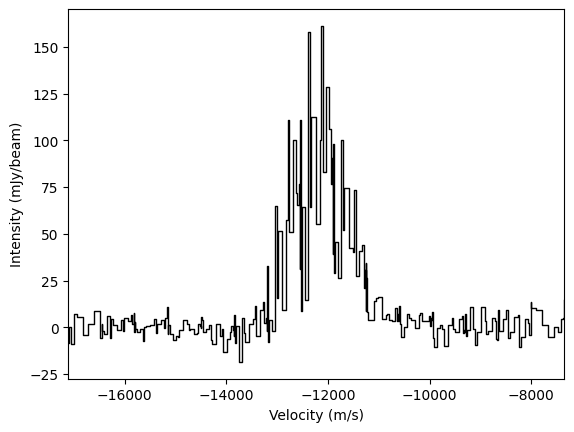

In [25]:
x, y, dy = annulus.deprojected_spectrum(vrot=v_phi, resample=False)
print('mean spacing = {:.1f} m/s'.format(np.diff(x).mean()))
annulus.plot_spectrum(vrot=v_phi, resample=False)




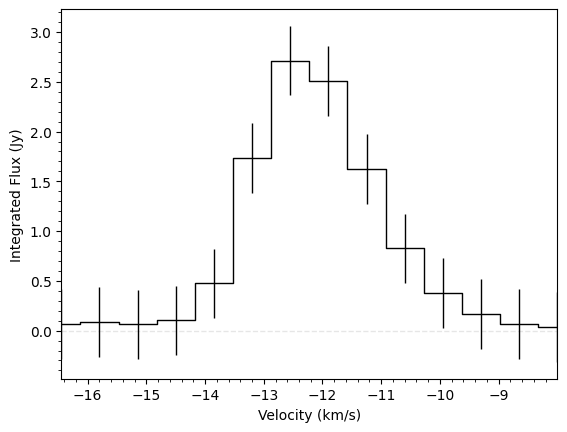

In [26]:
cube.plot_spectrum()

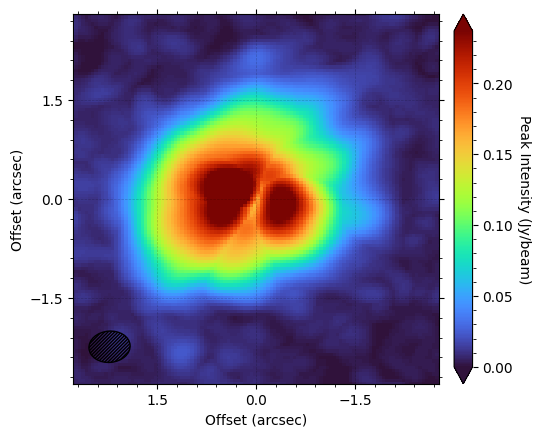

In [27]:
cube.plot_maximum()

In [37]:
annulus = cube.get_annulus(r_min=0.5, r_max=0.6, inc=38.5, PA=241.0)

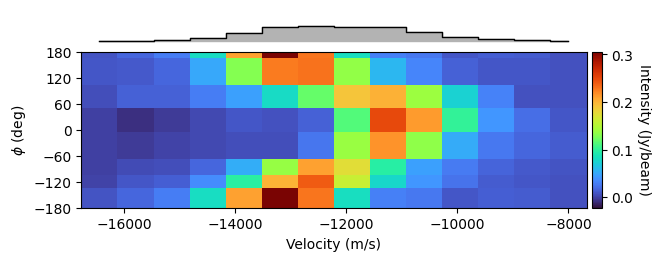

In [38]:
annulus.plot_river()

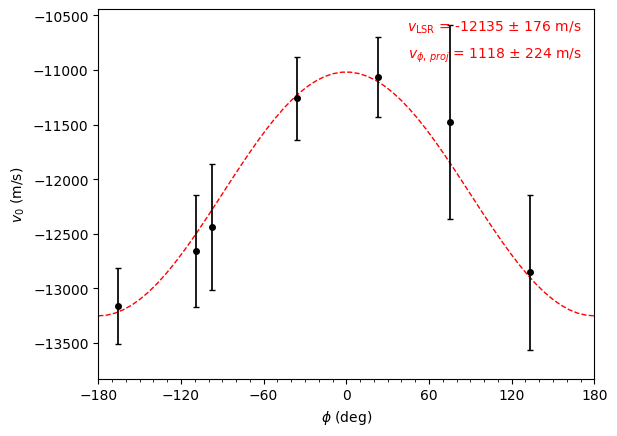

In [39]:
annulus.plot_centroids(plot_fit=True, centroid_method='quadratic')

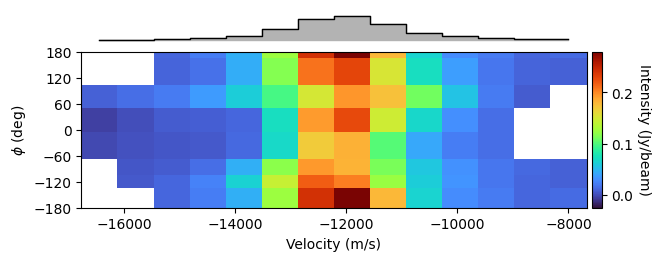

In [40]:
annulus.plot_river(vrot=annulus.get_vlos_SHO()[0][0])